In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('crawling10.csv', sep=';',header=None, encoding = 'cp1252')
print(df.shape)

(1029, 1)


In [ ]:
df.head(10)

,0
0,@M45Broo_ He3...bekerja untuk rakyat ? setelah...
1,RT @SautAritonang11: NKRI MENANGIS ?????\n\n1....
2,RT @detikcom: Ketum RN meminta pengurus RN men...
3,@caul_tanjung GUOBLOKKK.\n\nKenaikan harga men...
4,@AlifaRaisa @AloneIcalpalevi @keuangannews_id ...
5,@ArmanRitonga2 @NEGERISAKIT @DokterTifa harga ...
6,@Kopet0011 @HelmiFelis_ BBM NAIK HARGA KEBUTUH...
7,RT @Gusmail30414192: https://t.co/0VHY1TAJ2A\n...
8,RT @tvOneNews: Kenaikan Harga BBM Terbukti Tur...
9,"Harga Minyak Dunia Turun-Naik, Potensi Penurun..."


In [ ]:
df = df.rename({0:'tweet'}, axis=1)
df.head()

,tweet
0,@M45Broo_ He3...bekerja untuk rakyat ? setelah...
1,RT @SautAritonang11: NKRI MENANGIS ?????\n\n1....
2,RT @detikcom: Ketum RN meminta pengurus RN men...
3,@caul_tanjung GUOBLOKKK.\n\nKenaikan harga men...
4,@AlifaRaisa @AloneIcalpalevi @keuangannews_id ...


In [ ]:
df = df.dropna()
print (df.shape)

(1029, 1)


In [ ]:
#cleansing

import string
import re

def remove_tweet_spesial(text):


  text = text.replace('\\t', ' ').replace('\\n', ' ').replace('\\u', ' ').replace('\\', ' ')

  text = text.encode('ascii', 'replace').decode('ascii')

  text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", ' ', text).split())

  return text.replace("http://","").replace("htpps://","")

df['tweet']= df['tweet'].apply(remove_tweet_spesial)
df['tweet'] = df['tweet'].str.slice(2)
df.head(10)

,tweet
0,He3...bekerja untuk rakyat ? setelah pertamina...
1,: NKRI MENANGIS ????? 1. Upah buruh minimum??...
2,: Ketum RN meminta pengurus RN mengawal distr...
3,anjung GUOBLOKKK. Kenaikan harga menyesuaikan ...
4,d Dari jaman orba saya udah ngerasain bbm naik...
5,"rga bbm naik brpa rupiah demo, harga rokok kok..."
6,BBM NAIK HARGA KEBUTUHAN POKOK.MAHAL JOKOWI BA...
7,: Ada 6 tuntutan yang akan disampaikan di ant...
8,: Kenaikan Harga BBM Terbukti Turunkan Daya B...
9,"rga Minyak Dunia Turun-Naik, Potensi Penurunan..."


In [ ]:
df.to_csv ('result removespec.csv')

In [ ]:
import string
import re

#remove number
def remove_number(text):
  return re.sub(r"\d+","", text)
df['tweet']= df['tweet'].apply(remove_number)
df.head(10)

,tweet
0,He...bekerja untuk rakyat ? setelah pertamina ...
1,: NKRI MENANGIS ????? . Upah buruh minimum?? ...
2,: Ketum RN meminta pengurus RN mengawal distr...
3,anjung GUOBLOKKK. Kenaikan harga menyesuaikan ...
4,d Dari jaman orba saya udah ngerasain bbm naik...
5,"rga bbm naik brpa rupiah demo, harga rokok kok..."
6,BBM NAIK HARGA KEBUTUHAN POKOK.MAHAL JOKOWI BA...
7,: Ada tuntutan yang akan disampaikan di anta...
8,: Kenaikan Harga BBM Terbukti Turunkan Daya B...
9,"rga Minyak Dunia Turun-Naik, Potensi Penurunan..."


In [ ]:
df.to_csv ('result removenum.csv')

In [ ]:
#remove punctuation

def remove_punctuation(text):
  return text.translate(str.maketrans("","", string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punctuation)
df.head()

,tweet
0,Hebekerja untuk rakyat setelah pertamina dipe...
1,NKRI MENANGIS Upah buruh minimum Hargahar...
2,Ketum RN meminta pengurus RN mengawal distri...
3,anjung GUOBLOKKK Kenaikan harga menyesuaikan d...
4,d Dari jaman orba saya udah ngerasain bbm naik...


In [ ]:
df.to_csv ('result removepunc.csv')

In [ ]:
#remove single char

def remove_singl_char(text):
  return re.sub (r"\b[a-zA-Z]\b","",text)

df['tweet'] = df['tweet'].apply(remove_singl_char)
df.head(10)

,tweet
0,Hebekerja untuk rakyat setelah pertamina dipe...
1,NKRI MENANGIS Upah buruh minimum Hargahar...
2,Ketum RN meminta pengurus RN mengawal distri...
3,anjung GUOBLOKKK Kenaikan harga menyesuaikan d...
4,Dari jaman orba saya udah ngerasain bbm naik ...
5,rga bbm naik brpa rupiah demo harga rokok kok ...
6,BBM NAIK HARGA KEBUTUHAN POKOKMAHAL JOKOWI BAG...
7,Ada tuntutan yang akan disampaikan di antar...
8,Kenaikan Harga BBM Terbukti Turunkan Daya Be...
9,rga Minyak Dunia TurunNaik Potensi Penurunan H...


In [ ]:
df.to_csv ('result removesing.csv')

In [ ]:
#casefolding

df['tweet']=df['tweet'].str.lower()
df.head()

,tweet
0,hebekerja untuk rakyat setelah pertamina dipe...
1,nkri menangis upah buruh minimum hargahar...
2,ketum rn meminta pengurus rn mengawal distri...
3,anjung guoblokkk kenaikan harga menyesuaikan d...
4,dari jaman orba saya udah ngerasain bbm naik ...


In [ ]:
df.to_csv('result casefolding.csv')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(text):
  return word_tokenize(text)

df['tweet']=df['tweet'].apply(word_tokenize_wrapper)
df.head()

,tweet
0,"[hebekerja, untuk, rakyat, setelah, pertamina,..."
1,"[nkri, menangis, upah, buruh, minimum, hargaha..."
2,"[ketum, rn, meminta, pengurus, rn, mengawal, d..."
3,"[anjung, guoblokkk, kenaikan, harga, menyesuai..."
4,"[dari, jaman, orba, saya, udah, ngerasain, bbm..."


In [ ]:
df.to_csv('tokenizing.csv')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(['ik','jk','hebekerja','ruh','ner','ghtride','ga','brpa', 'rn','anjung','guoblokkk','mo','tum','ra','renakan','sj','dri','rp','klo', 'kalo', 'gak', 'au','tdk','dari','rt', 'th', 'stiap','loren','atra','dll','yg','jak','krn','krna','xt','pe', 'bm','rga','apapun','nya','man','ttp','workloa','uya','is','oya','Oya','xb','to','xre','x','kacem','keum','kea','wts','deh','loh','kl','do','oiya','oya','nih','ok','ah','xad', 'xd','xa','xe','rt','xv','yg','xm','kalo','pt','gue','bilang','xf','kkkkkkkkk'])

txt_stopword = pd.read_csv('stopwords.csv', names= ["stopwords"], header =None)

list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

list_stopwords = set(list_stopwords)

def stopwords_removal(words):
  return [word for word in words if word not in list_stopwords]

df['tweet'] = df['tweet'].apply(stopwords_removal)
df.head(20)

In [ ]:
df.to_csv('stopword remov.csv')

In [ ]:
df.to_csv('prepocessing.csv')

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('prepocessing.csv', usecols=['tweet'])
df.columns = ['tweet']

df.head()

,tweet
0,"['rakyat', 'pertamina', 'dipegang', 'rugi', 'r..."
1,"['nkri', 'menangis', 'upah', 'buruh', 'minimum..."
2,"['ketum', 'pengurus', 'mengawal', 'distribusi'..."
3,"['kenaikan', 'harga', 'menyesuaikan', 'harga',..."
4,"['jaman', 'orba', 'udah', 'ngerasain', 'bbm', ..."


In [ ]:
import ast

def join_text_list(texts):
  texts = ast.literal_eval(texts)
  return' '.join([text for text in texts])

df['tweet'] = df['tweet'].apply(join_text_list)
df.head()

,tweet
0,rakyat pertamina dipegang rugi ratusan trilyun...
1,nkri menangis upah buruh minimum hargaharga na...
2,ketum pengurus mengawal distribusi blt sasaran...
3,kenaikan harga menyesuaikan harga pasaran waja...
4,jaman orba udah ngerasain bbm mulu mbak btw sb...


In [ ]:
import difflib

review_text_list = df['tweet'].tolist()

reviews = review_text_list
s = difflib.SequenceMatcher(None, reviews).ratio()
print ("ratio:", s,"\n")

ratio: 0.0 



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from nltk import FreqDist
import seaborn as sns

def freq_words (x, terms =30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})

  d = words_df.nlargest(columns="count",n=terms)
  plt.figure (figsize=(25,7))
  ax = sns.barplot(data=d, x="word",y="count")
  ax.set(ylabel='Count')
  plt.show()

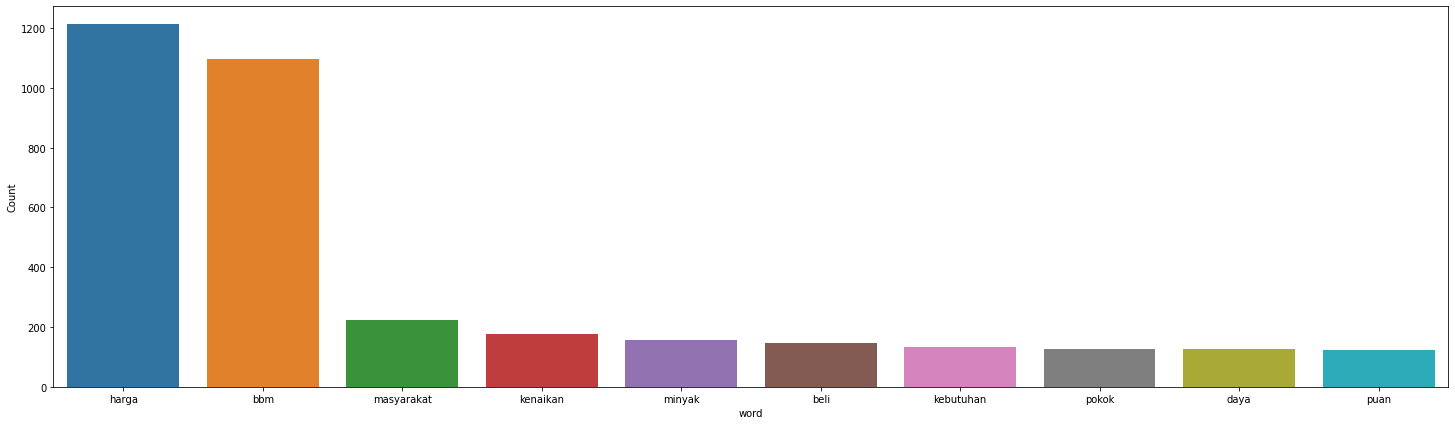

In [ ]:
freq_words(df['tweet'],10)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
cvec = CountVectorizer(stop_words='english', min_df=1, max_df=.5, ngram_range=(1,2))
cvec

CountVectorizer(max_df=0.5, ngram_range=(1, 2), stop_words='english')

In [ ]:
from itertools import islice
from nltk.corpus import stopwords
global str

cvec.fit(review_text_list)
list(islice(cvec.vocabulary_.items(), 20))

len(cvec.vocabulary_)

6526

In [ ]:
cvec = CountVectorizer(stop_words='english', min_df=.0025, max_df=.5, ngram_range=(1,2))
cvec.fit(review_text_list)
len(cvec.vocabulary_)

1349

In [ ]:
cvec_counts = cvec.transform(review_text_list)
print('sparse matrix shape:', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %.2f%%' %(100.00 * cvec_counts.nnz / (cvec_counts.shape[0]*cvec_counts.shape[1])))

sparse matrix shape: (1029, 1349)
nonzero count: 14831
sparsity: 1.07%


In [ ]:
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame ({'term':cvec.get_feature_names(),'occurrences':occ})
counts_df.sort_values(by='occurrences', ascending=False).head(50)

In [ ]:
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

<1029x1349 sparse matrix of type '<class 'numpy.float64'>'
	with 14831 stored elements in Compressed Sparse Row format>

In [ ]:
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term' : cvec.get_feature_names(),'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(50)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
107,bbm harga,0.031579
714,masyarakat,0.028436
810,minyak,0.024296
592,kenaikan,0.022787
149,beli,0.022382
573,kebutuhan,0.021198
268,daya,0.020638
1281,turun,0.020556
1013,pokok,0.020555
269,daya beli,0.019788


In [ ]:
word_dict = {}
for i in range(0,len(df['tweet'])):
  sentence = df['tweet'][i]
  word_token = word_tokenize (sentence)
  for j in word_token:
    if j not in word_dict:
      word_dict[j] = 1
    else:
      word_dict[j] += 1

In [ ]:
len(word_dict)

2291

In [ ]:
len({k:v for (k,v) in word_dict.items() if v < 4})

1521

In [ ]:
negasi = ['bukan','tidak','ga','gk']
lexicon= pd.read_csv('lexiconlengkap.csv')
lexicon= lexicon.drop(lexicon[(lexicon['word']=='bukan')
|(lexicon['word']== 'tidak')
|(lexicon['word']== 'ga')
|(lexicon['word']== 'gk')].index,axis=0)
lexicon = lexicon.reset_index(drop=True)

In [ ]:
 len(lexicon)

10248

In [ ]:
lexicon.head(10)

,word,weight,number_of_words
0,hai,3,1
1,merekam,2,1
2,ekstensif,3,1
3,paripurna,1,1
4,detail,2,1
5,pernik,3,1
6,belas,2,1
7,welas,4,1
8,kabung,1,1
9,rahayu,4,1


In [ ]:
lexicon_word = lexicon ['word'].to_list()
lexicon_num_words = lexicon ['number_of_words']

In [ ]:
len(lexicon_word)

10248

In [ ]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 7.6 MB/s 


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
ns_words = []
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for word in word_dict.keys():
  if word not in lexicon_word:
    kata_dasar = stemmer.stem(word)
    if kata_dasar not in lexicon_word:
      ns_words.append(word)
len(ns_words)

1453

In [ ]:
df.to_csv('stemming.csv')

In [ ]:
len({k:v for (k,v)in word_dict.items()if ((k in ns_words)&(v>3))})

450

In [ ]:
ns_word_list = {k:v for (k,v)in word_dict.items()if ((k in ns_words)&(v>3))}

In [ ]:
sort_orders = sorted(ns_word_list.items(), key=lambda x: x[1], reverse=True)
sort_orders = sort_orders [0:20]
for i in sort_orders:

  print(i[0],i[1])

bbm 1096
masyarakat 223
minyak 155
daya 126
puan 124
subsidi 103
demokrat 100
mengeluhkan 94
rakyat 87
pro 82
nyak 78
presiden 76
udah 74
buruh 70
pemerintah 70
dpr 64
kpd 60
ahy 54
ekonomi 49
sembako 45


In [ ]:
lexicon['number_of_words'].value_counts()

1    9536
2     686
3      24
4       2
Name: number_of_words, dtype: int64

In [ ]:
sencol = []
senrow = np.array ([])
nsen = 0
factory = StemmerFactory()
stemmer = factory.create_stemmer()
sentiment_list = []

In [ ]:
sencol =[]
senrow =np.array([])
nsen = 0
factory = StemmerFactory()
stemmer = factory.create_stemmer()
sentiment_list = []
# function to write the word's sentiment if it is founded
def found_word(ind,words,word,sen,sencol,sentiment,add):
    # if it is already included in the bag of words matrix, then just increase the value
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
    #if not, than add new word
        sencol.append(word)
        sen.append(1)
        add += 1
    #if there is a negation word before it, the sentiment would be the negation of it's sentiment
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]

    return sen,sencol,sentiment,add

# checking every words, if they are appear in the lexicon, and then calculate their sentiment if they do
for i in range(len(df)):
    nsen = senrow.shape[0]
    words = word_tokenize(df["tweet"][i])
    sentiment = 0
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]

    for word in words:
        ind = words.index(word)
        # check whether they are included in the lexicon
        if word in lexicon_word :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        else:
        # if not, then check the root word
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
        # if still negative, try to match the combination of words with the adjacent words
            elif(n_words>1):
                if ind-1>-1:
                    back_1    = words[ind-1]+' '+word
                    if (back_1 in lexicon_word):
                        sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
                    elif(ind-2>-1):
                        back_2    = words[ind-2]+' '+back_1
                        if back_2 in lexicon_word:
                            sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
    # if there is new word founded, then expand the matrix
    if add>0:
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
    # if there isn't then just update the old matrix
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))

    sentiment_list.append(sentiment)

In [ ]:
sencol.append('sentiment')
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
df_sen = pd.DataFrame(sentiment_data,columns = sencol)

In [ ]:
df_sen.head(5)

,pegang,rugi,jual,premium,untung,dunia,turun,harga,menangis,upah,...,kampret,girang,usik,pengen,suasana,meributkan,tajam,tumpul,maaf,sentiment
0,1,2,2,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,17
4,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,12


In [ ]:
res_df = pd.DataFrame([])
res_df ['tweet'] = df ['tweet'].copy()
res_df['sentimen']=df_sen['sentiment'].copy()

In [ ]:
res_df.head()

,tweet,sentimen
0,rakyat pertamina dipegang rugi ratusan trilyun...,0
1,nkri menangis upah buruh minimum hargaharga na...,0
2,ketum pengurus mengawal distribusi blt sasaran...,6
3,kenaikan harga menyesuaikan harga pasaran waja...,17
4,jaman orba udah ngerasain bbm mulu mbak btw sb...,12


In [ ]:
label = []
for index, row in res_df.iterrows():
    if row["sentimen"] >=0:
      label.append(1)
    else:
      label.append(0)
res_df["label"] = label
res_df = res_df.drop(columns=['sentimen'])
res_df.head()

,tweet,label
0,rakyat pertamina dipegang rugi ratusan trilyun...,1
1,nkri menangis upah buruh minimum hargaharga na...,1
2,ketum pengurus mengawal distribusi blt sasaran...,1
3,kenaikan harga menyesuaikan harga pasaran waja...,1
4,jaman orba udah ngerasain bbm mulu mbak btw sb...,1


In [ ]:
res_df.head(50)

,tweet,label
0,rakyat pertamina dipegang rugi ratusan trilyun...,1
1,nkri menangis upah buruh minimum hargaharga na...,1
2,ketum pengurus mengawal distribusi blt sasaran...,1
3,kenaikan harga menyesuaikan harga pasaran waja...,1
4,jaman orba udah ngerasain bbm mulu mbak btw sb...,1
5,bbm rupiah demo harga rokok demo,0
6,bbm harga kebutuhan pokokmahal jokowi uang blt...,1
7,tuntutan kenaikan upah menolak kenaikan harg,0
8,kenaikan harga bbm terbukti turunkan daya beli...,1
9,minyak dunia turunnaik potensi penurunan harga...,1


In [ ]:
df.to_csv('label.csv')

In [ ]:
res_df['label'].value_counts()

1    804
0    225
Name: label, dtype: int64

1029


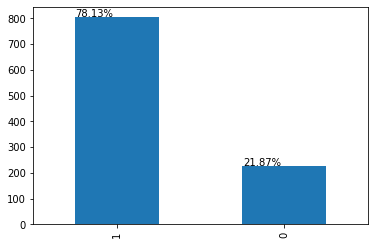

In [ ]:
s = pd.value_counts(res_df['label'])
ax = s.plot.bar()
n = len (res_df.index)
print (n)
for p in ax.patches:
  ax.annotate(str(round(p.get_height()/n *100,2)) +'%',(p.get_x()* 1.005, p.get_height()*1.005))

In [ ]:
y = np.array([78,21])
mylabels = ["negative", "positive"]

plt.pie(y, labels= mylabels)
plt.show()

In [ ]:
klasifikasibbm = res_df
klasifikasibbm.head(20)

,tweet,label
0,rakyat pertamina dipegang rugi ratusan trilyun...,1
1,nkri menangis upah buruh minimum hargaharga na...,1
2,ketum pengurus mengawal distribusi blt sasaran...,1
3,kenaikan harga menyesuaikan harga pasaran waja...,1
4,jaman orba udah ngerasain bbm mulu mbak btw sb...,1
5,bbm rupiah demo harga rokok demo,0
6,bbm harga kebutuhan pokokmahal jokowi uang blt...,1
7,tuntutan kenaikan upah menolak kenaikan harg,0
8,kenaikan harga bbm terbukti turunkan daya beli...,1
9,minyak dunia turunnaik potensi penurunan harga...,1


In [ ]:
df.to_csv('klasifikasi.csv')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [ ]:
Train_X, Test_X, Train_Y,Test_Y = model_selection.train_test_split(klasifikasibbm['tweet'],klasifikasibbm['label'])

Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(klasifikasibbm['tweet'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [ ]:
len(Train_X)

771

In [ ]:
len(Train_X)
Train_X.head(10)

828    ogannya pancasila nkri harga mati keadilan sos...
871    hargaharga kontrol ayo semangat fokus kontrol ...
217    an polemik kenaikan harga bbm salah isu diaten...
609    naikan harga bbm terbukti turunkan daya beli b...
546    lu ledekin si bogel pake calsea bone aja harga...
708                              aja udah harga lu turun
634    kesempatan bwt buzzer untk mencela pks booooon...
880    nyak masyarakat keluhankeluhan mengeluhkan har...
451    bbm buruh kenaikan upah dprd sumedang aspirasi...
274    lau dipikirpikir harga bbm bermunculan penjual...
Name: tweet, dtype: object

In [ ]:
len(Test_X)

258

In [ ]:
len(Test_X)
Test_X.head(29)

816    nyak masyarakat keluhan kpd mengeluhkan harga ...
939              bbm harga ikutan putar otak sesuap nasi
24                           mbako bbm harga doang turun
793    an polemik kenaikan harga bbm salah isu diaten...
803    nyak masyarakat keluhan kpd mengeluhkan harga ...
378    adil menurunkan harga bbm kemarin alasan bbm h...
283    oren harga minyak turun subsidi harga minyak t...
72     kesempatan bwt buzzer untk mencela pks booooon...
771    an polemik kenaikan harga bbm salah isu diaten...
493                  kyat hasto berkuasa harga harga bbm
522    dah minyak dunia jg lampung mendukung penyesua...
461    kompakan harga minyak dunia stabil bantingan h...
600    politik nul utk menyatukan indonesia lg nul ga...
521    dah sebulan harga bbm pertalite solar subsidi ...
6      bbm harga kebutuhan pokokmahal jokowi uang blt...
874                   fektif harga minyak dunia naek bbm
645    kalah rakyat wakanda yarakyatnya super sabarte...
899    tolol cebongdibohongin m

In [ ]:
from sklearn import naive_bayes
NB = naive_bayes.MultinomialNB()
NB.fit(Train_X_Tfidf,Train_Y)

predictions_NB = NB.predict(Test_X_Tfidf)

print("NB Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

NB Accuracy Score ->  85.65891472868216


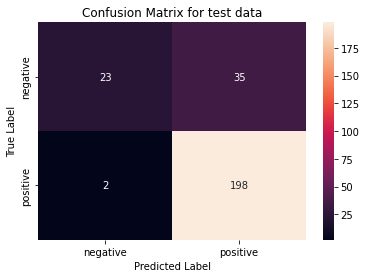

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sentiment_list
conf_mat = confusion_matrix(Test_Y, predictions_NB)
class_label = ["negative","positive"]
test = pd.DataFrame (conf_mat, index=class_label,columns=class_label)
sns.heatmap(test,annot =True, fmt="d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
bbmneg = klasifikasibbm.loc[klasifikasibbm['label']==0]
bbmneg.head(63)

,tweet,label
5,bbm rupiah demo harga rokok demo,0
7,tuntutan kenaikan upah menolak kenaikan harg,0
10,buruh demo istana usung tuntutan tolak kenaika...,0
11,demo istana usung tuntutan tolak kenaikan harg...,0
14,afiiz dijelasin utang membangun infrastructure...,0
...,...,...
236,ssa buruh demonstrasi menolak kenaikan harga b...,0
240,ssa buruh demonstrasi menolak kenaikan harga b...,0
248,gausah mobil kak liat aja antrian bbm subsidi ...,0
254,puk bersubsidi langka mahal sich biaya produks...,0


In [ ]:
import difflib
neg_text_list = bbmneg['tweet'].tolist()
reviews_neg = neg_text_list

In [ ]:
from nltk.corpus import stopwords
indonesian_stopwords = stopwords.words('indonesian')
print(len(indonesian_stopwords))
text_neg = str(neg_text_list)

758


In [ ]:
from nltk.tokenize import word_tokenize
tokens_neg = word_tokenize(text_neg)

In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.corpus import stopwords

stop_words =set(stopwords.words('indonesian'))
negative = [w for w in tokens_neg if not w in stop_words]
extend = 'a'
negative =[w for w in negative if not w in extend]

negative = [nltk.stem.WordNetLemmatizer().lemmatize(word)for word in negative]

In [ ]:
import string
table = str.maketrans ('', '', string.punctuation)
strippedneg = [w.translate(table) for w in negative]

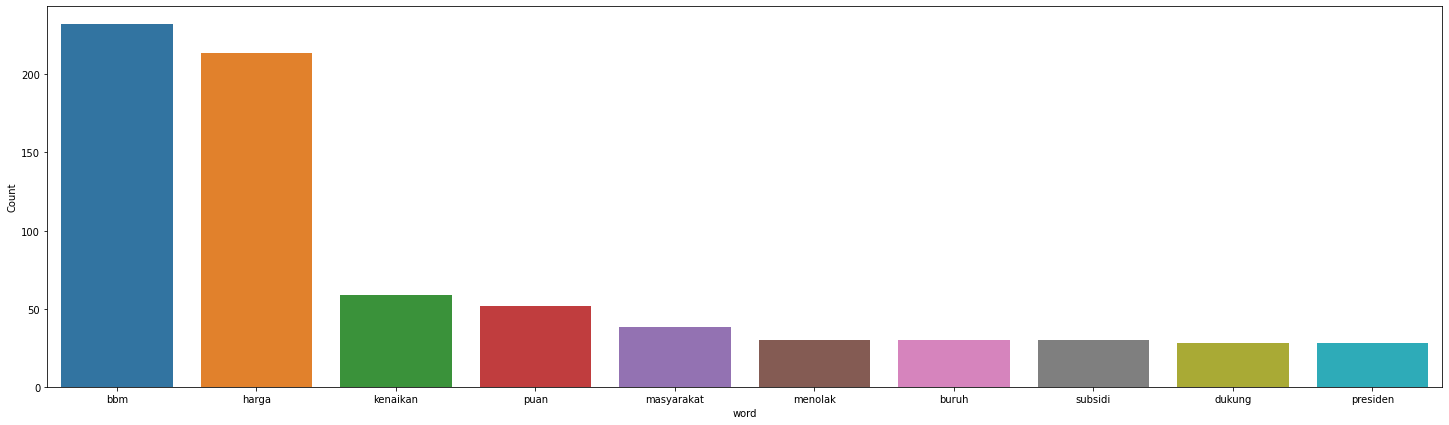

In [ ]:
freq_words(strippedneg, 10)

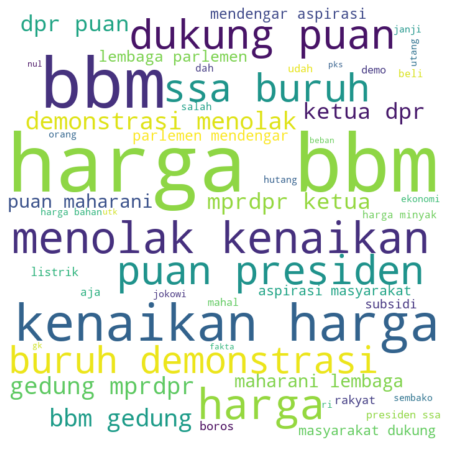

In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

all_text_negative = ' '.join(str(word)for word in strippedneg)
wordcloud= WordCloud(max_font_size=260, max_words=50,width=700,height=700,mode='RGBA',background_color='white').generate(all_text_negative)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0,y=0)
plt.show()

In [ ]:
bbmpos = klasifikasibbm.loc[klasifikasibbm['label']==1]
bbmpos.head(94)

,tweet,label
0,rakyat pertamina dipegang rugi ratusan trilyun...,1
1,nkri menangis upah buruh minimum hargaharga na...,1
2,ketum pengurus mengawal distribusi blt sasaran...,1
3,kenaikan harga menyesuaikan harga pasaran waja...,1
4,jaman orba udah ngerasain bbm mulu mbak btw sb...,1
...,...,...
117,lu ledekin si bogel pake calsea bone aja harga...,1
118,lu ledekin si bogel pake calsea bone aja harga...,1
119,lu ledekin si bogel pake calsea bone aja harga...,1
120,lu ledekin si bogel pake calsea bone aja harga...,1


In [ ]:
import difflib
pos_text_list = bbmpos['tweet'].tolist()
reviews_pos = pos_text_list

In [ ]:
from nltk.corpus import stopwords
indonesian_stopwords = stopwords.words('indonesian')
print(len(indonesian_stopwords))
text_pos = str(pos_text_list)

758


In [ ]:
from nltk.tokenize import word_tokenize
tokens_pos = word_tokenize(text_pos)

In [ ]:
from nltk.corpus import stopwords

stop_words =set(stopwords.words('indonesian'))
positive = [w for w in tokens_pos if not w in stop_words]
extend = 'a'
positive =[w for w in positive if not w in extend]

positive = [nltk.stem.WordNetLemmatizer().lemmatize(word)for word in positive]

In [ ]:
import string
table = str.maketrans ('', '', string.punctuation)
strippedpos = [w.translate(table) for w in positive]

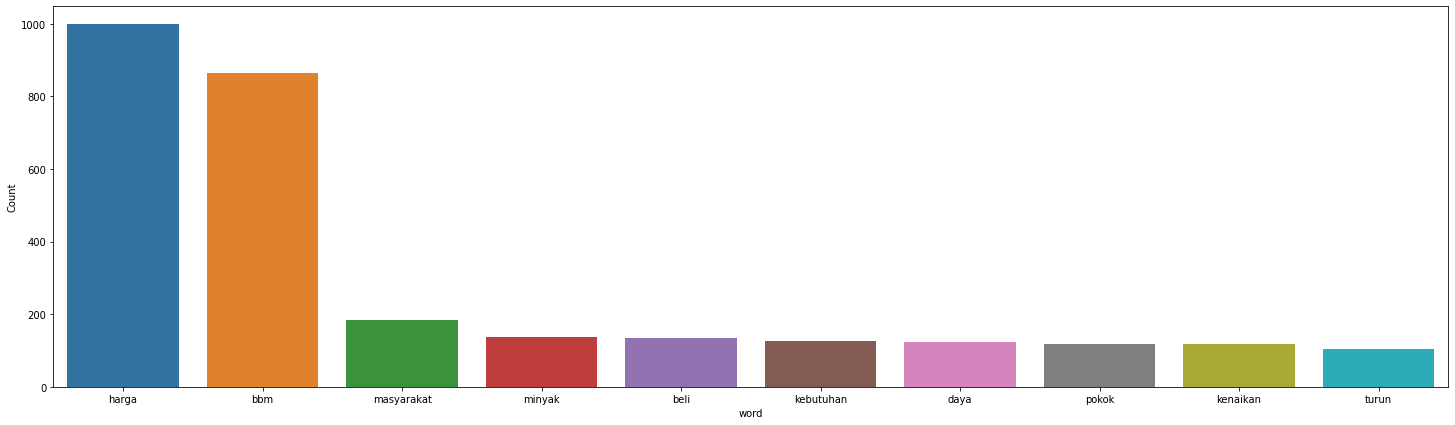

In [ ]:
freq_words(strippedpos, 10)

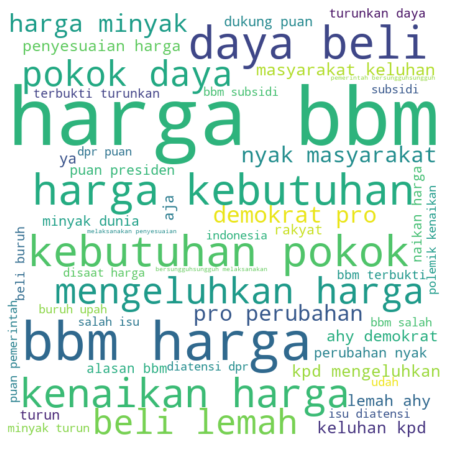

In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

all_text_positive = ' '.join(str(word)for word in strippedpos)
wordcloud= WordCloud(max_font_size=260, max_words=50,width=700,height=700,mode='RGBA',background_color='white').generate(all_text_positive)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0,y=0)
plt.show()

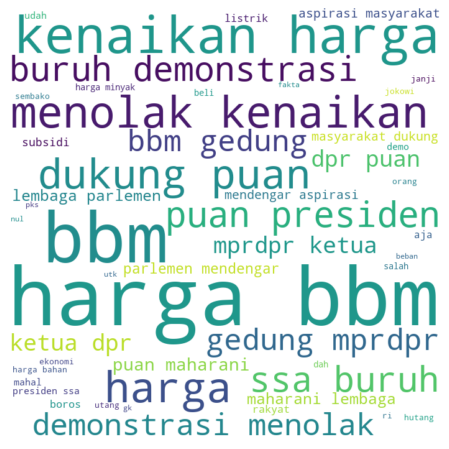

In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

all_text_positive = ' '.join(str(word)for word in klasifikasibbm)
wordcloud= WordCloud(max_font_size=260, max_words=50,width=700,height=700,mode='RGBA',background_color='white').generate(all_text_negative)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0,y=0)
plt.show()

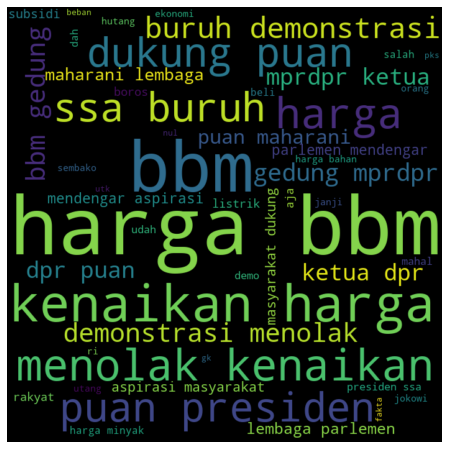

In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

all_text_negative = ' '.join(str(word)for word in strippedneg)
wordcloud= WordCloud(max_font_size=260, max_words=50,width=700,height=700,mode='RGBA',background_color='black').generate(all_text_negative)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0,y=0)
plt.show()